# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [227]:

import pandas as pd  
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from yellowbrick.cluster import KElbowVisualizer  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

- PENYEBAB KEMATIAN DI INDONESIA YANG DI LAPORKAN

In [228]:
df = pd.read_csv("../clustering_df.csv")
df.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [229]:
# 1
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")
print("-----------------------------------------------")
df.info()


Jumlah baris: 1062
Jumlah kolom: 8
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            1062 non-null   object
 1   Type             1062 non-null   object
 2   Year             1062 non-null   int64 
 3   Data Redundancy  1062 non-null   int64 
 4   Total Deaths     1062 non-null   int64 
 5   Source           1062 non-null   object
 6   Page at Source   1060 non-null   object
 7   Source URL       1060 non-null   object
dtypes: int64(3), object(5)
memory usage: 66.5+ KB


In [230]:
# 2
print(df.isnull().sum())
# DIHAPUS


Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     2
Source URL         2
dtype: int64


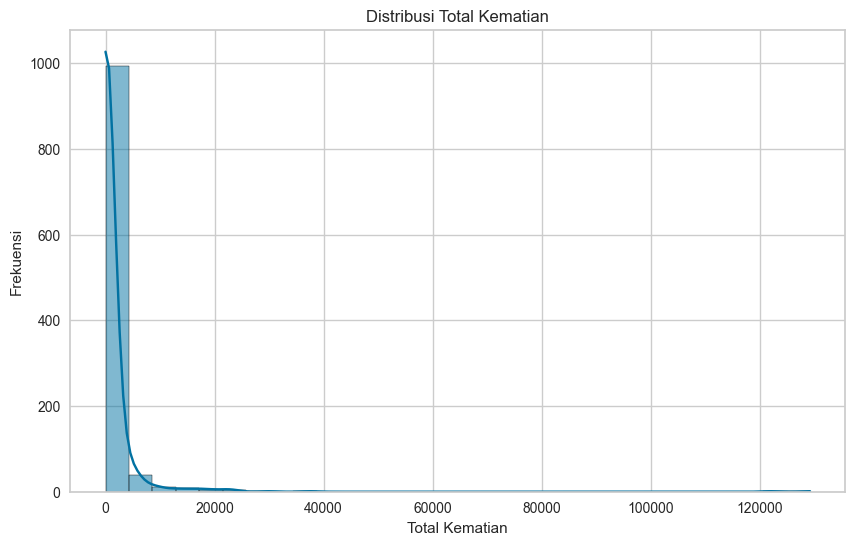

In [231]:
# 3
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Deaths'], bins=30, kde=True)
plt.title('Distribusi Total Kematian')
plt.xlabel('Total Kematian')
plt.ylabel('Frekuensi')
plt.show()


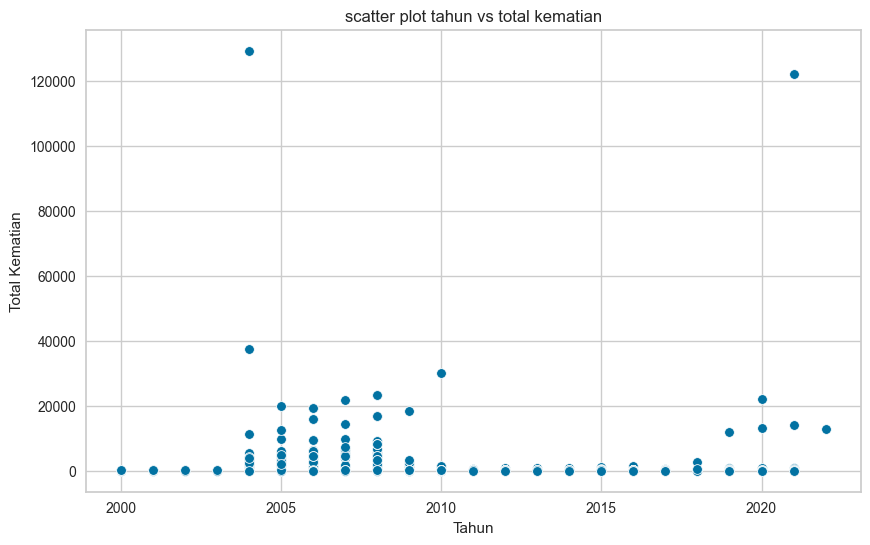

In [232]:
# 3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Total Deaths', data=df)
plt.title('scatter plot tahun vs total kematian')
plt.xlabel('Tahun')
plt.ylabel('Total Kematian')
plt.show()

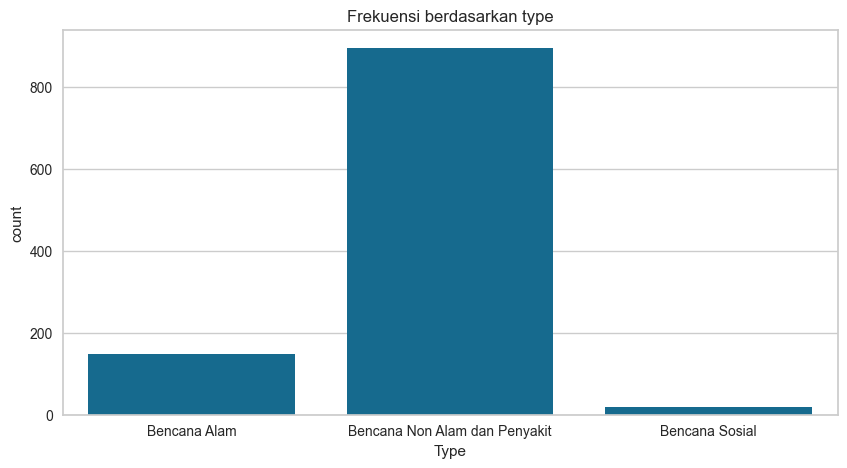

In [233]:
# 4
plt.figure(figsize=(10, 5))
sns.countplot(x='Type', data=df)
plt.title("Frekuensi berdasarkan type")
plt.show()


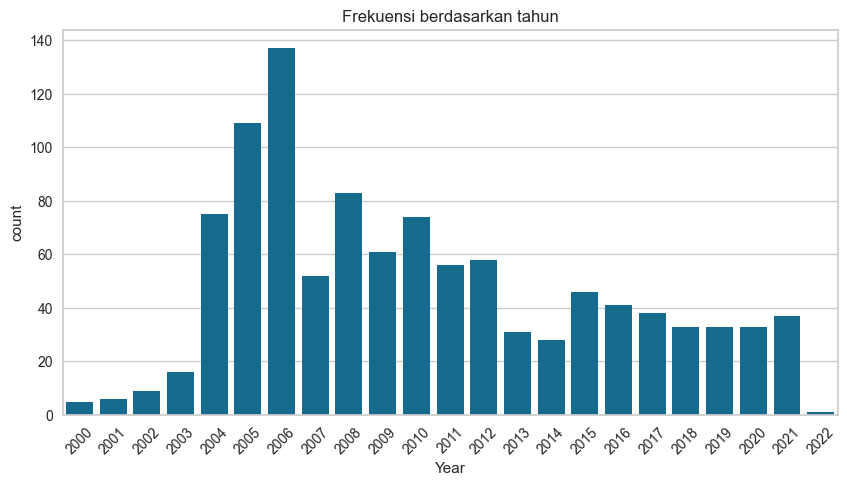

In [234]:
# 4
plt.figure(figsize=(10, 5))
sns.countplot(x='Year', data=df)
plt.title("Frekuensi berdasarkan tahun")
plt.xticks(rotation=45)
plt.show()


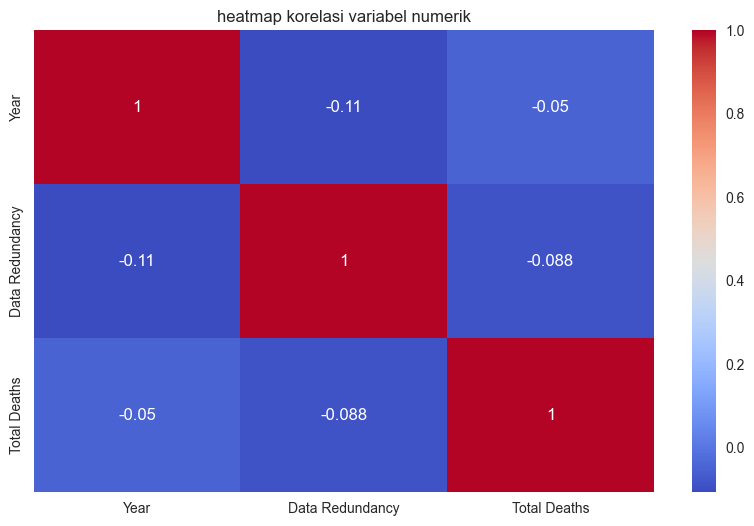

In [235]:
# 4
df_numerik = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numerik.corr(), annot=True, cmap="coolwarm")
plt.title("heatmap korelasi variabel numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [236]:
# 
df.describe()
# df.info()

,Year,Data Redundancy,Total Deaths
count,1062.000000,1062.000000,1062.000000
mean,2010.202448,2.932203,1194.364407
std,5.227120,2.776486,6248.983680
min,2000.000000,1.000000,0.000000
25%,2006.000000,1.000000,6.000000
50%,2009.000000,1.000000,42.000000
75%,2014.000000,4.000000,261.000000
max,2022.000000,12.000000,129171.000000


In [237]:
df = df.dropna() 
print(df.isnull().sum())

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
dtype: int64


In [238]:
print("Jumlah duplikasi: ", df.duplicated().sum())
df = df.drop_duplicates()
print("-------------------------------------------------")
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  1
-------------------------------------------------
Jumlah duplikasi:  0


In [239]:
label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])
df.head()


,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,0,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,1,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,1,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,1,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,1,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [240]:
numerical_cols = ["Data Redundancy", "Total Deaths"]
X = df[numerical_cols]

In [241]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

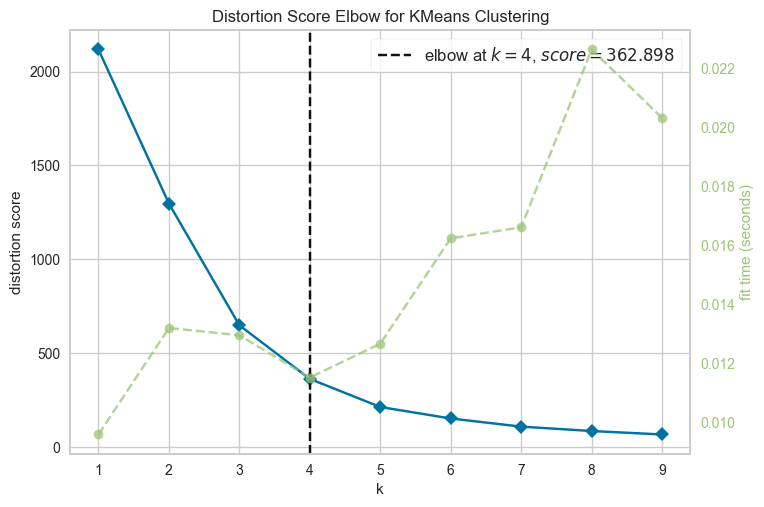

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [242]:
kmeans = KMeans(n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_scaled)
visualizer.show()

In [243]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df[["Year", "Data Redundancy", "Total Deaths", "Cluster"]].head())



   Year  Data Redundancy  Total Deaths  Cluster
0  2012                1             0        0
1  2000                1            47        0
2  2001                1            99        0
3  2002                1           100        0
4  2003                5           261        1


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

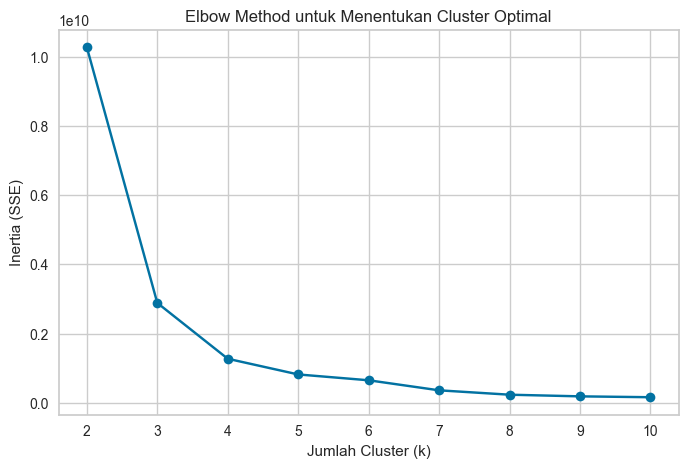

In [244]:
inertia = []
K = range(2, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) 

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method untuk Menentukan Cluster Optimal')
plt.show()

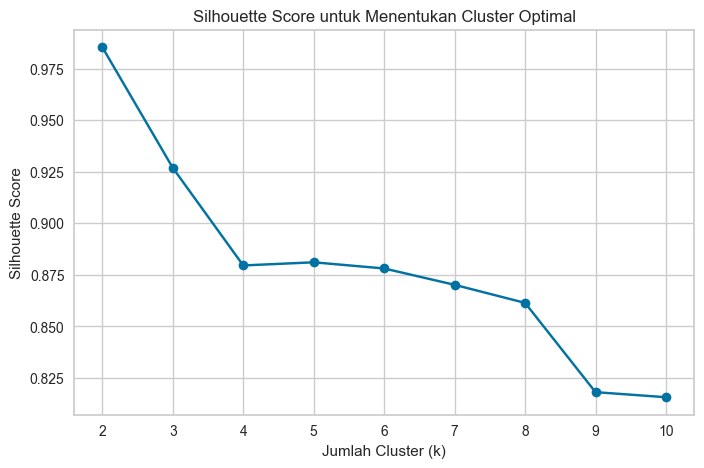

In [245]:
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Cluster Optimal')
plt.show()

In [246]:
optimal_k = 4

# Lakukan clustering dengan jumlah cluster yang telah dipilih
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
labels = kmeans.fit_predict(X)

# Hitung silhouette score
score = silhouette_score(X, labels)
print(f'Silhouette score untuk {optimal_k} cluster: {score:.4f}')

Silhouette score untuk 4 cluster: 0.8795


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

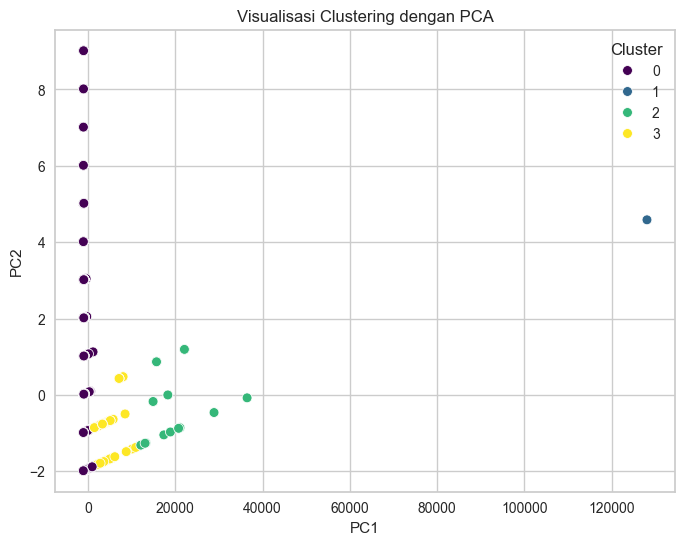

In [247]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisasi Clustering dengan PCA')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [248]:
df_normalized['Cluster'] = kmeans.labels_
df_original = df.copy()
df_original_values = scaler.inverse_transform(df_normalized[numerical_cols])
df_original_normalized = pd.DataFrame(df_original_values, columns=numerical_cols)
df_original[numerical_cols] = df_original_normalized[numerical_cols]
df_original['Cluster'] = df_normalized['Cluster']
df_original.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL,Cluster
0,Abrasi Air Laut,0,2012,1.0,0.0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
1,AIDS,1,2000,1.0,47.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
2,AIDS,1,2001,1.0,99.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
3,AIDS,1,2002,1.0,100.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
4,AIDS,1,2003,5.0,261.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [111]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [249]:
numerical_cols = df_original.select_dtypes(include=['number']).columns
cluster_summary = df_original.groupby('Cluster')[numerical_cols].mean()
print(cluster_summary)



             Type         Year  Data Redundancy   Total Deaths  Cluster
Cluster                                                                
0.0      0.874867  2010.494168         3.082715     173.879109      0.0
1.0      0.000000  2020.000000         1.000000  129171.000000      1.0
2.0      0.850000  2007.150000         1.800000   19729.700000      2.0
3.0      0.934783  2007.206522         1.608696    4819.706522      3.0


In [250]:
print(df_original.dtypes)

Cause               object
Type                 int64
Year                 int64
Data Redundancy    float64
Total Deaths       float64
Source              object
Page at Source      object
Source URL          object
Cluster            float64
dtype: object


In [251]:
df_original.groupby('Cluster')[['Total Deaths', 'Data Redundancy']].mean()


,Total Deaths,Data Redundancy
Cluster,,
0.0,173.879109,3.082715
1.0,129171.000000,1.000000
2.0,19729.700000,1.800000
3.0,4819.706522,1.608696


Tulis hasil interpretasinya di sini.
1. Cluster 0:
- **Rata-rata Total Deaths:** 173.88
- **Rata-rata Data Redundancy:** 3.08
- **Analisis:** cluster ini mencakup kejadian dengan jumlah kematian yang relatif rendah namun memiliki tingkat redundancyi data yang lebih tinggi kemungkinan, cluster ini terdiri dari kejadian yang sering terdokumentasi dalam berbagai sumber
2. Cluster 1:
- **Rata-rata Total Deaths:** 129,171.00
- **Rata-rata Data Redundancy:** 1.00
- **Analisis:** cluster ini mencerminkan kejadian dengan jumlah kematian yang sangat tinggi, tetapi dengan tingkat redundancy data yang paling rendah hal ini menunjukkan bahwa kejadian dalam cluster ini mungkin merupakan peristiwa yang besar yang terdokumentasi secara unik tanpa banyak variasi sumber
3. Cluster 2:
- **Rata-rata Total Deaths:** 19,729.70
- **Rata-rata Data Redundancy:** 1.80
- **Analisis:** cluster ini mencerminkan kejadian dengan jumlah kematian yang sangat tinggi, tetapi dengan tingkat redundancy data yang paling rendah hal ini menunjukkan bahwa kejadian dalam cluster ini mungkin merupakan peristiwa besar yang terdokumentasi secara unik tanpa banyak variasi sumber
4. Cluster 3:
- **Rata-rata Total Deaths:** 4,819.71
- **Rata-rata Data Redundancy:** 1.60
- **Analisis:** cluster ini mencakup kejadian dengan jumlah kematian yang sedang dan tingkat redundancy data yang relatif rendah kemungkinan cluster ini berisi kejadian yang cukup signifikan namun tidak mendominasi dalam cakupan berita atau dokumentasi.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:

df_original.to_csv("inisiasi_df.csv", index=False)